<a href="https://colab.research.google.com/github/adolfoguimaraes/datascience/blob/main/code/12_laboratorio_redesneurais1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais e Deep Learning 


Neste módulo vamos trabalhar alguns conceitos básicos sobre Redes Neurais. Por ser um tutorial mais básico vou utilizar o próprio scikit-learn. Um estudo mais aprofundado das redes neurais será colocado juntamente com o material de deep learning e PyTorch.

As redes neurais vem de um desejo de criar máquinas que de alguma forma "imitem" o comportamento humano. Melhor ainda, "imitar" um comportamento que ocorre de forma natural no cérebro humano. 

Nós humanos conseguimos realizar tarefas que para nós são simples e imediatas, mas que ao passa-las para uma máquina não se tornam tão simples. O desenvolvimento das redes neurais parte do princípio de construir um mecanismo que possa de alguma forma executar as tarefas realizadas pelo cérebro humano. 

Para entender como as redes neurais funcionam, é preciso entender como funciona o sistema nervoso humano. 

## Entendendo o cérebro humano

A imagem a seguir mostra o principal componente do sistema nervoso humano: os neurônios. É através deles que o cérebro transmite e processa a gama de informações que capturamos. A estrutura complexa do cérebro faz tarefas extramamente complexas parecerem triviais. 

<img src="http://profadolfoguimaraes-wiki.herokuapp.com/assets/disciplinas/mle/modulo8/redesneurais_neuronio.png">

Para entender um pouco de como o neorônio, veja o vídeo a seguir:

<iframe width="560" height="315" src="https://www.youtube.com/embed/r8D16C6-D5M" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Redes Neurais Artificiais (RNA)

> **Definição**
>
> As RNAs são sistemas computacionais distribuídos compostos de unidades de processamento simples, densamente interconectadas. Essas unidades, conhecidas como neurônios artificiais, computam funções matemáticas. As unidades são dispostas em uma ou mais camadas e interligadas por um grade número de conexões, geralmente unidirecionais. Na maioria das arquiteturas, essas conexões, que simulam as sinapses biológicas, possuem pesos associados, que ponderam a entrada recebida por cada neurônio da rede. Os pesos podem assumir valores positivos ou negativos, dependendo se o comportamento da conexão é excitatório ou inibitório, respectivamente. Os pesos têm seus valores ajustados em um processo de aprendizado e codificam o conhecimento adquirido pela rede".

A imagem a seguir mostra a arquitetura de um neurônio artificial:

<img src="https://www.data2learning.com/machinelearning/images_notebook/redesneurais_rna.png">

O neurônio com $d$ terminais (que simula os dendritos) recebe como entrada um objeto $x$ com $d$ atributos. Esse objeto é representado pelo vetor $x = [x_1, x_2, ..., x_d]^t$. Cada terminal do neurônio tem um peso $w$ associado. Estes pesos podem ser representados também por um vetor $w = [w_1, w_2, ..., w_d]$. A entrada total do neurônio é representada pela equação:

$u = \sum_{j=1}^{d}{x_j w_j}$

A saída do neurônio é determinada pela aplicação de um função de ativação ($f_a$) à entrada total $u$:

<img src="https://www.data2learning.com/machinelearning/images_notebook/redesneurais_fa.png">

Várias funções de ativações aparecem na literatura. A imagem a seguir mostra três dessas funções: (a) linear, (b) limiar e (c) sigmoidal:

<img src="https://www.data2learning.com/machinelearning/images_notebook/redesneurais_funcoes.png">

A **função linear identidade** implica retornar como saída o valor de $u$. 

Na **função limiar**, o valor do limiar define quando o resultado da função será igual a 0 ou 1. Quando a soma das entradas recebidas ultrapassa o limiar estabelecido, o neurônio torna-se ativo (valor 1). Quanto maior o valor do limiar, maior tem que ser o valor da entrada total para que o valor de saída do neurônio seja igual a 1. 

Na **função sigmoidal**, diferentes inclinações podem ser utilizadas.

Em uma rede neural, os neurônios podem está dispostos em mais de uma camada. Em uma arquitetura de várias camadas a saída de um neurônio é entrada para outro neurônio. A imagem a seguir mostra esse tipo de arquitetura: 

<img src="https://www.data2learning.com/machinelearning/images_notebook/redesneurais_multicamadas.png">

Alguns modelos de redes neurais permite a retroalimentação (ou *feedback*). Nesse tipo de redes é permitido que um neurônio receba como entrada as saídas geradas por camadas posteriores ou pela própria camada. Desta forma, podemos classificar as redes neurais em **RNA _feedfoward_** (sem retroalimentação) ou redes recorrentes (com retroalimentação).

## Rede Perceptron

A rede perceptron é a forma mais simples de configuração de uma rede neural artificial. A arquitetura da rede se aproxima daquela que foi apresentada no problema de regressão linear. 

A imagem a seguir mostra a arquitetura da rede perceptron. 

<img src="https://www.embarcados.com.br/wp-content/uploads/2016/09/Perceptron-01.png" />

Observe que a rede é composta por um conjunto de sinais de entrada:

$x_{train} = [x_1, x_2, ..., x_n]$

Cada sinal é poderado por um peso w, dado por: 

$weights = [w_1, w_2, ..., w_3]$ 

e somado por um limiar de ativação ($\theta$). Sendo assim, o neurônio é representado pela seguinte operação: 

$u = \sum_{i=1}^{n}{w_i*x_i} + bias$

O valor inicial do $bias$ é dado por $-\theta$. Neste exemplo, $\theta = 1$.

### O processo de aprendizagem de uma rede neural

Uma vez que nosso modelo está criado, vamos definir como nosso modelo será treinado. Ou seja, como um modelo deste tipo aprende. 

Supondo que estamos trabalhando com uma tarefa de classificação, cada instância vai ser classificada como 0 ou 1 de acordo com a classe que pertence. Sendo assim, o primeiro passo é comparar a saída com a classificação da base de treinamento. Para isso foi calculado o erro da seguinte forma:

$mse = \sum_{i = 1}^{N}{(y_i - output_i)^2}$

onde $y_i$ é o valor real e $output_i$ o valor encontrado pelo modelo. 

O objetivo do treinamento é reduzir esse erro. Em outras palavras, estamos interessados em encontrar valores para os _pesos_ e _bias_ que minimizem este erro.

Nesse exemplo, a função de ativação é dada pela função limiar a seguir: 

$y = g(u) = 1$, se $u >= 0$

$y = g(u) = 0$, se $u < 0$

O paso seguinte no processo de treinamento é a atualização dos valores dos pesos e do limiar. Esses parâmetros são atualizados segundo fórmula descrita no livro do Ivan Nunes. 

$$w_{i}^{atual} = w_{i}^{anterior} + \eta (d^{(k)} - y).x_{i}^{(k)}$$

$$\theta_{i}^{atual} = \theta_{i}^{anterior} + \eta (d^{(k)} - y).(-1)$$

onde:

$d^{(k)}$ é o valor desejado e $y$, o valor de saída produzido pela perceptron. Essa diferença é representada pelo que chamamos do erro que é minimizado. $\eta$ é uma constante que define a taxa de aprendizagem da rede. 

O valor da taxa de apendizagem define a magnitude dos ajustes dos pesos. Valores altos fazem com que as variações sejam grandes, enquanto taxas pequenas implicam em poucas variações nos pesos. Essa magnitude influencia a velocidade de convergência. 

O algoritmo a seguir mostra o processo de treinamento da rede perceptron.

<img src="https://www.data2learning.com/machinelearning/images_notebook/redesneurais_algperceptron.png">

Uma introdução mais detalhada de como funciona a rede perceptron pode ser encontrada no vídeo a seguir:

<iframe width="560" height="315" src="https://www.youtube.com/embed/pkAKtL9FvFI" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>


### Implementação utilizando o scikit-learn

A rede perceptron é utilizada em problemas que são ditos linearmente separáveis. Entende-se por esse tipo de problema aqueles que são compostos por dados que podem ser separados por uma função linear. Para isso, vamos criar um conjunto de dados que possuem tal característica. Como o propósito é só mostrar o funcionamento da rede, vamos criar um conjunto de dados sem nenhum próposito específico.

Os dados de entrada são constituídos de várias instâncias contendo duas variáveis cada ($x_1$ e $x_2$) e cada instância é classificada em 0 ou 1. Sendo assim, a tarefa da rede é aprender um modelo que seja capaz de separar estas duas classes. O código a seguir cria os dados e os exibem em um gráfico. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [ ]:
def dataset1():

    # Criando os dados de entrada (x = features e y = classes)
    x_train = np.array([[2., 2.], [1., 3.],
                        [2., 3.], [5., 3.],
                        [7., 3.], [2., 4.],
                        [3., 4.], [6., 4.],
                        [1., 5.], [2., .5],
                        [5., 5.], [4., 6.],
                        [6., 6.], [5., 7.]], dtype="float32")
    y_train = np.array([0, 0,
                        0, 1,
                        1, 0,
                        0, 1,
                        0, 0,
                        1, 1,
                        1, 1], dtype="int")

    return x_train, y_train


In [ ]:
def dataset2():

    #Criando os dados de entrada (x = features e y = classes)
    x_train = np.array([[2., 2.],[1., 3.],
                        [2., 3.],[5., 3.],
                        [7., 3.],[2., 4.],
                        [3., 4.],[6., 4.],
                        [1., 5.],[2., .5],
                        [5., 5.],[4., 6.],
                        [6., 6.],[5., 7.]],dtype="float32")
    y_train = np.array([0, 1, 
                        0, 1, 
                        1, 0, 
                        0, 0, 
                        0, 1, 
                        0, 1, 
                        1, 1], dtype="int")

    return x_train, y_train

    

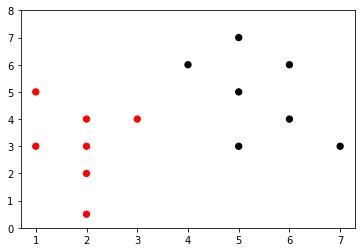

In [ ]:

x_train, y_train = dataset1()

#Mostrando o Gráfico
A = x_train[:, 0]
B = x_train[:, 1]

colormap = np.array(['r', 'k'])

# Plot the original data
plt.scatter(A, B, 
            c=colormap[y_train], 
            s=40)

plt.ylim([0,8]) # Limit the y axis size
plt.show()

In [ ]:
net = Perceptron(
    max_iter=100,
    eta0=0.1,
    random_state=0,
    verbose=False)


X = x_train
y = y_train.T

net.fit(X, y)


Perceptron(eta0=0.1, max_iter=100, verbose=False)

In [ ]:
# Output the coefficints
print("Coefficient 0 " + str(net.coef_[0,0]))
print("Coefficient 1 " + str(net.coef_[0,1]))
print("Bias " + str(net.intercept_))

Coefficient 0 1.1000000000000008
Coefficient 1 -0.19999999999999918
Bias [-2.8]


(0.0, 8.0)

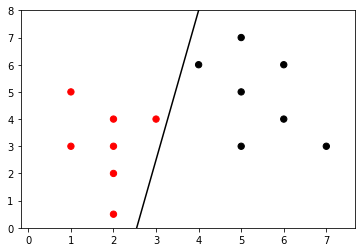

In [ ]:
# Plot the original data
plt.scatter(A, B, c=colormap[y_train], s=40)
 
# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
w = net.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (net.intercept_[0]) / w[1]
 
# Plot the hyperplane
plt.plot(xx,yy, 'k-')
plt.ylim([0,8]) # Limit the y axis size

In [ ]:
net.score(X, y)

1.0

### O problema de redes com uma camada

> **O poblema dessas redes**
>
> Uma limitação das redes neurais de uma comada, como as redes perceptron e adaline, é que elas conseguem classificar apenas objetos que são linearmente separáveis.
{.is-info}

Supondo que tenhamos uma base de dados com dois atributos. Se plotarmos estes dados em um plano cartesiano, eles vão ser linearmente separáveis se existe uma reta que separa os objetos de uma classe dos objetos de outra classe. 


<img src="http://2.bp.blogspot.com/_NpEM479W8bw/SMAykBAnOUI/AAAAAAAAADE/qmpAY4AoyDo/s320/Linear.PNG">
<img src="http://4.bp.blogspot.com/_NpEM479W8bw/SMAykRqIgYI/AAAAAAAAADM/35mfeqXHi4k/s320/Non+Linear.PNG">

Se em vez de dois atributos a base possui $d$ atributos, o espaço de soluções será $d$-dimensional. Neste caso, os objetos são linearmente separáveis se houver um hiperplano que separe os dados das duas classes.

Vamos usar o mesmo modelo para uma outra base de dados.

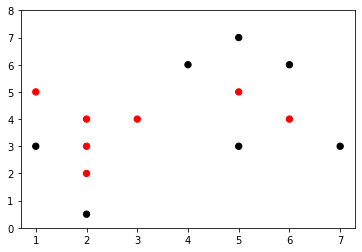

In [ ]:

x_train, y_train = dataset2()

#Mostrando o Gráfico
A = x_train[:, 0]
B = x_train[:, 1]

colormap = np.array(['r', 'k'])

# Plot the original data
plt.scatter(A, B, 
            c=colormap[[0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1]], 
            s=40)

plt.ylim([0,8]) # Limit the y axis size
plt.show()

In [ ]:
net = Perceptron(
    max_iter=100,
    eta0=0.1,
    random_state=0,
    verbose=False)


X = x_train
y = y_train.T

net.fit(X, y)


Perceptron(eta0=0.1, max_iter=100, verbose=False)

(0.0, 8.0)

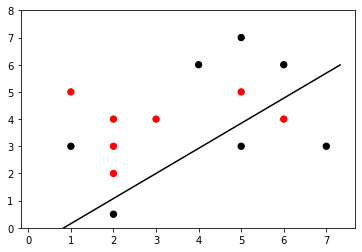

In [ ]:
# Plot the original data
plt.scatter(A, B, c=colormap[y_train], s=40)
 
# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
w = net.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (net.intercept_[0]) / w[1]
 
# Plot the hyperplane
plt.plot(xx,yy, 'k-')
plt.ylim([0,8]) # Limit the y axis size

In [ ]:
net.score(X, y)

0.6428571428571429

## Multilayer Perceptron

Uma rede perceptron multicamadas (*Multilayer Perceptron - MLP*) é caracterizada pela presença de pelo menos uma camada intermediária (escondida ou *hidden layer*) de neurônios, situada entre a camada de entrada e a respectiva camada neural de saída. Sendo assim, as MLP possuem pelo menos duas camadas de nurônios, o quais estarão distribuídos entre as camadas intermediárias e a camada de saída. 

A figura a seguir ilustra este modelo.

![drawing](https://elogeel.files.wordpress.com/2010/05/050510_1627_multilayerp1.png)

Vamos executar o mesmo exemplo, só que agora utilizando uma MLP. 

In [ ]:
x_train, y_train = dataset1()

mlpnet = MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.001, max_iter=300)


X = x_train
y = y_train.T

mlpnet.fit(X, y)


MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300)

In [ ]:
mlpnet.score(X, y)

1.0

In [ ]:
x_train, y_train = dataset2()

mlpnet = MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.001, max_iter=300)


X = x_train
y = y_train.T

mlpnet.fit(X, y)


/Users/adolfoguimaraes/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300)

In [ ]:
mlpnet.score(X, y)

1.0

Vamos olhar outros dados

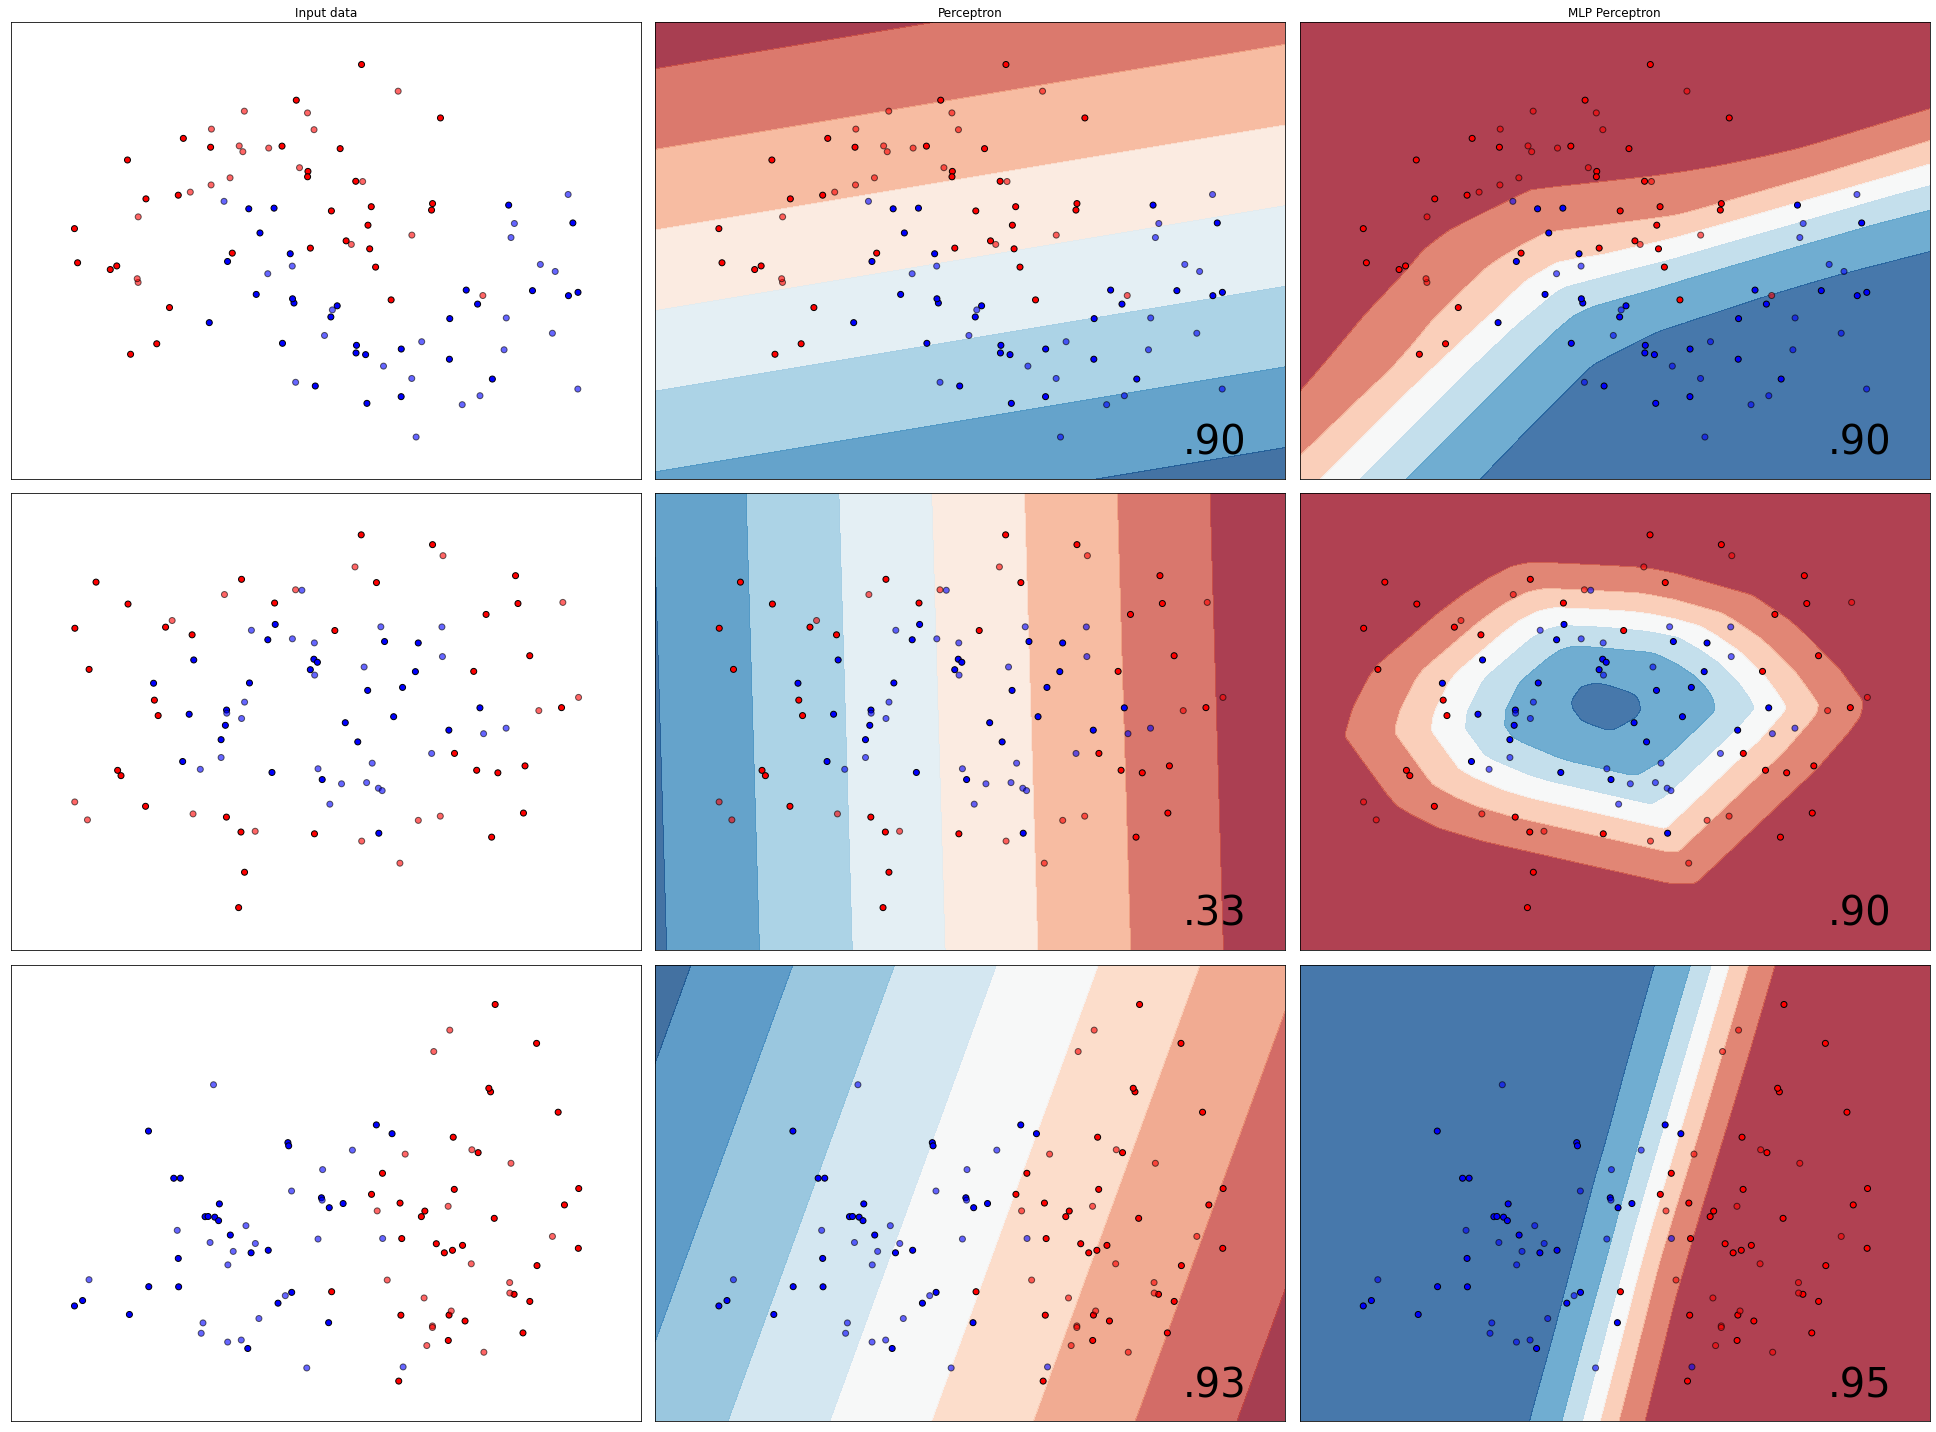

In [ ]:

# Code link: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

h = 0.02  # step size in the mesh

names = [
    'Perceptron',
    'MLP Perceptron'
]

classifiers = [
    Perceptron(max_iter=100, eta0=0.1, random_state=0,verbose=False),
    MLPClassifier(alpha=1, max_iter=1000),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 20))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])

    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    if ds_cnt == 0:
        ax.set_title("Input data")

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )

        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=40,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()